In [4]:
from controller import Imager
import time
import cv2
import polanalyser as pa
from PIL import Image
import matplotlib.pyplot as plt
from mpldatacursor import datacursor
import numpy as np
import os


In [5]:
imager = Imager()

Found 1 devices
Devices IDs - ['101934']


In [6]:
imager.cams[-1].remote_device.node_map.ExposureAuto.value = 'Off'
PIXELFORMATS = {'8':'Mono8','12':'Mono12Packed'}
PIXELFORMAT = PIXELFORMATS['8']
imager.update_params(ExposureTime=20000, PixelFormat=PIXELFORMAT)

In [7]:
imager._start_acquisitions()
# imager._stop_acquisitions()

0 - 2021-10-18 12:42:39.994490 - 101934 captured Mono8 image 


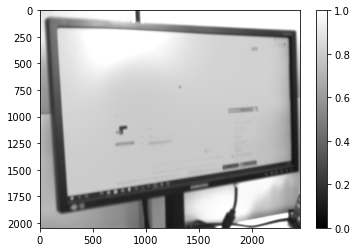

In [21]:
init_image = imager.capture_sequence(1, 0,0)
for im in init_image[0]:
    im = np.squeeze(np.array(im))
    plt.imshow(im, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
    cbar = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=plt.get_cmap('gray')))
    plt.show()


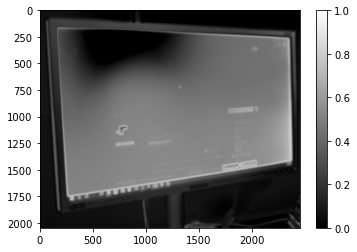

In [22]:
for im in init_image[0]:
    im = np.squeeze(np.array(im))
    img_demosaiced = pa.demosaicing(im)
    img_0, img_45, img_90, img_135 = cv2.split(img_demosaiced)
    Stokes =  pa.calcLinearStokes(np.moveaxis(np.array([img_0, img_45, img_90, img_135]), 0, -1),
                                  np.deg2rad([0,45,90,135]))
    I = Stokes[:, :, 0]
    DoLP = pa.cvtStokesToDoLP(Stokes)
    AoLP = (180/np.pi)*pa.cvtStokesToAoLP(Stokes)-90

    plt.imshow(DoLP, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    cbar = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=plt.get_cmap('gray')))
    plt.show()


In [ ]:
raw_images, metadata = imager.capture_sequence(50, 0.3,0)

In [25]:
r = 8
num = 1
directory = f"./rehearsal/r{r}{num}"
os.mkdir(directory)
for i, nagla in enumerate(raw_images):
    os.mkdir(f"./{directory}/{i}")
    for img, met in zip(nagla, metadata[i*5:(i*5)+5]):
        np.save(f'./{directory}/{i}/{met[1].strftime("%Y_%m_%d_%H%M%S")}_{met[2]}', img)

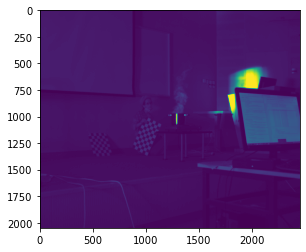

In [29]:
plt.imshow(raw_images[15][2])

KeyboardInterrupt: 

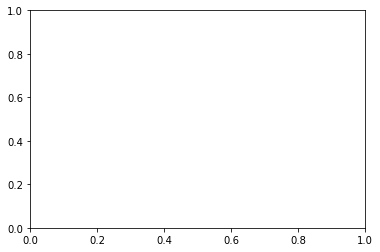

In [40]:
plt.hist(raw_images[0], bins=80, type="histtype")

In [ ]:
im_n = 50
sleep1 = 0.5
sleep2 = sleep1
raw_images = imager.capture_sequence(im_n, sleep1, 0.5)

0 - 2021-10-13 08:40:17.787790 - 101936 captured Mono12Packed image 
0 - 2021-10-13 08:40:17.880247 - 101934 captured Mono12Packed image 
1 - 2021-10-13 08:40:18.458175 - 101936 captured Mono12Packed image 
1 - 2021-10-13 08:40:18.541759 - 101934 captured Mono12Packed image 
2 - 2021-10-13 08:40:19.137293 - 101936 captured Mono12Packed image 
2 - 2021-10-13 08:40:19.226176 - 101934 captured Mono12Packed image 
3 - 2021-10-13 08:40:19.813243 - 101936 captured Mono12Packed image 
3 - 2021-10-13 08:40:19.927136 - 101934 captured Mono12Packed image 
4 - 2021-10-13 08:40:20.537167 - 101936 captured Mono12Packed image 
4 - 2021-10-13 08:40:20.625676 - 101934 captured Mono12Packed image 
5 - 2021-10-13 08:40:21.218900 - 101936 captured Mono12Packed image 
5 - 2021-10-13 08:40:21.297367 - 101934 captured Mono12Packed image 
6 - 2021-10-13 08:40:21.877724 - 101936 captured Mono12Packed image 
6 - 2021-10-13 08:40:21.949670 - 101934 captured Mono12Packed image 
7 - 2021-10-13 08:40:22.581781 - 1

0 - 2021-10-18 12:10:33.362408 - 101934 captured Mono8 image 


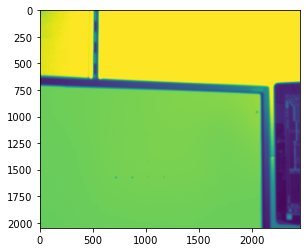

In [19]:
init_image = imager.capture_sequence(1, 0,0)
#init_image = np.squeeze(np.array(init_image))
for im in init_image[0]:
    im = np.squeeze(np.array(im))
    plt.imshow(im)
    plt.show()